In [1]:
%matplotlib inline

import sqlite3
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from Utility import Database as db
from Utility import Tabulate

In [2]:
def plot_epochs_migration_rate_vs_fitness(problem_name, population_size):
    # same y axis
    # get best results for an algorithm table
    algorithms = [
        'Island GA Ring Lattice',
        'Island GA Cell',
        'Island GA Hierarchy',
        'Island GA Caveman',
        'Island GA Rewired Caveman',
        'Island GA Watts Strogatz',
        'Island GA Full'
    ]
    
    fig = plt.figure(figsize=(15,18))
    subplots = fig.subplots((len(algorithms)//2)+1, 2, subplot_kw=dict(projection='3d'),)
    subplots = [item for sublist in subplots for item in sublist]
    
    min_fitness = 10000000000
    max_fitness = -10000000000
    
    for i, alg_name in enumerate(algorithms):
        results = db.con.execute(f'''
            select 
                config.epochs_till_migration,
                config.migration_rate,
                fitness
            from 
                result
            inner join 
                config
            on 
                result.config_id == config.config_id
            where 
                name="{problem_name}" and 
                population_size={population_size} and 
                algorithm="{alg_name}"
        ''').fetchall()

        df = pd.DataFrame(
            results, 
            columns=['Epoch', 'Migration Rate', 'Fitness'])
        df = df.groupby(['Epoch', 'Migration Rate']).mean().reset_index()
        
        ax = subplots[i]
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Migration Rate')
        ax.set_zlabel('Fitness')
        ax.set_title(alg_name)

        ax.plot_trisurf(df['Epoch'], df['Migration Rate'], df['Fitness'])
        
        min_fitness = min(min_fitness, df['Fitness'].min())
        max_fitness = max(max_fitness, df['Fitness'].max())
        
        
    for ax in subplots:
        ax.set_zlim(min_fitness, max_fitness)
    plt.show()

In [3]:
def get_best_results(problem_name, population_size):
    algorithms = [
        'Island GA Ring Lattice',
        'Island GA Cell',
        'Island GA Hierarchy',
        'Island GA Caveman',
        'Island GA Rewired Caveman',
        'Island GA Watts Strogatz',
        'Island GA Full'
    ]
    
    for i, alg_name in enumerate(algorithms):
        results = db.con.execute(f'''
            select 
                config.algorithm, 
                fitness,
                config.migration_rate,
                config.epochs_till_migration
            from 
                result
            inner join 
                config
            on 
                result.config_id == config.config_id
            where 
                name="{problem_name}" and 
                population_size={population_size}
            group by 
                config.algorithm
            having
                result.fitness == min(result.fitness)
            order by 
                result.fitness
        ''').fetchall()
        
    Tabulate.print_table([
            'Algorith', 
            'Fitness', 
            'Migration Rate', 
            'Epochs Per Migraiton'
        ],
        results)


In [4]:
def plot_calculations_fitness(problem_name, population_size):    
    results = db.con.execute(f'''
        select 
            config.algorithm, 
            config.fitness_calculations,
            config.epochs_till_migration,
            config.migration_rate,
            fitness
        from 
            result
        inner join 
            config
        on 
            result.config_id == config.config_id
        where 
            name="{problem_name}" and 
            population_size={population_size}
    ''').fetchall()

    df = pd.DataFrame(
        results, 
        columns=['Algorithm', 'Fitness Calculations', 'Epoch', 'Migration Rate', 'Fitness'])

    sns.set(rc = {'figure.figsize':(15,8)})
    sns.set_theme(style="darkgrid")
    sns.lineplot(data=df, x='Fitness Calculations', y='Fitness', hue='Algorithm')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

## Rastrigin, 640

In [5]:
get_best_results('Rastrigin', 640)

Algorith                      Fitness                Migration Rate     Epochs Per Migraiton     
Island GA Full                3.797806204723102      0.03               2                        
Island GA Watts Strogatz      6.307038603587561      0.01               2                        
Island GA Cell                8.372902776923484      0.03               2                        
Island GA Caveman             9.704951750689483      0.09               2                        
Island GA Rewired Caveman     10.723897649090746     0.19               2                        
Island GA Hierarchy           14.795598968767191     0.01               2                        
Island GA Ring Lattice        20.21260455374697      0.11               2                        
Island GA Empty               91.45033249121386      0.01               2                        


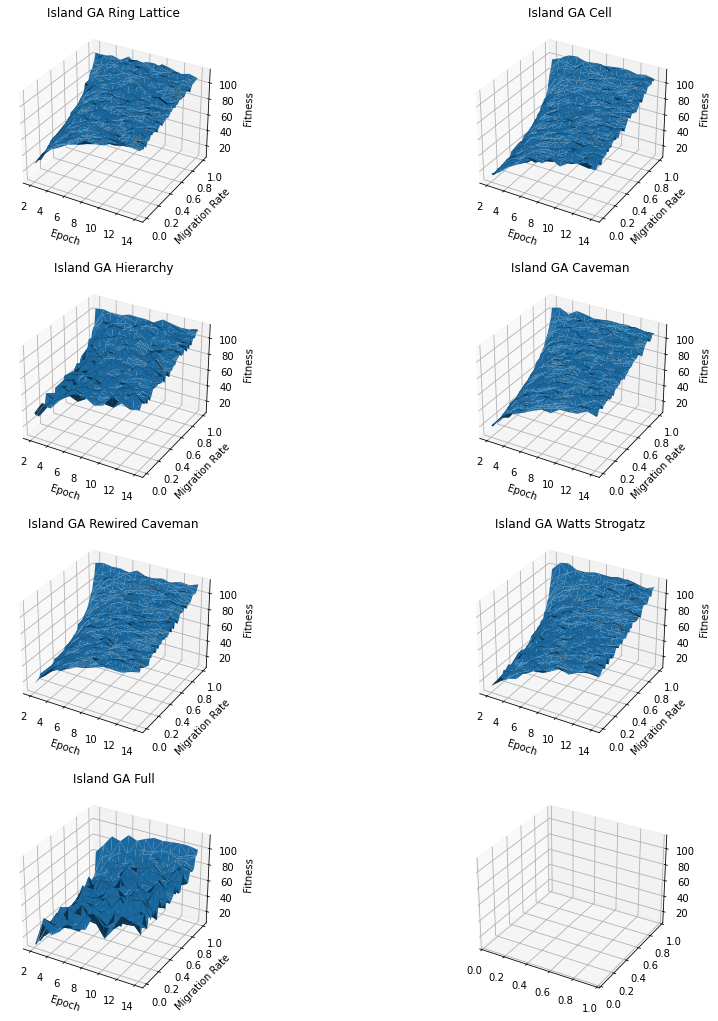

In [6]:
plot_epochs_migration_rate_vs_fitness('Rastrigin', 640)

## TSP, 320

In [7]:
get_best_results('TSP', 320)

Algorith                      Fitness     Migration Rate          Epochs Per Migraiton     
Island GA Full                11432.0     0.15000000000000002     2                        
Island GA Watts Strogatz      12591.0     0.03                    2                        
Island GA Caveman             12737.0     0.05                    2                        
Island GA Rewired Caveman     12836.0     0.03                    2                        
Island GA Cell                12851.0     0.06999999999999999     2                        
Simulated Annealing           13196.0     0.01                    1                        
Island GA Hierarchy           14235.0     0.06999999999999999     2                        
Island GA Ring Lattice        15714.0     0.03                    2                        
Island GA Empty               26449.0     0.01                    2                        
Genetic Algorithm             29154.0     0.01                    1             

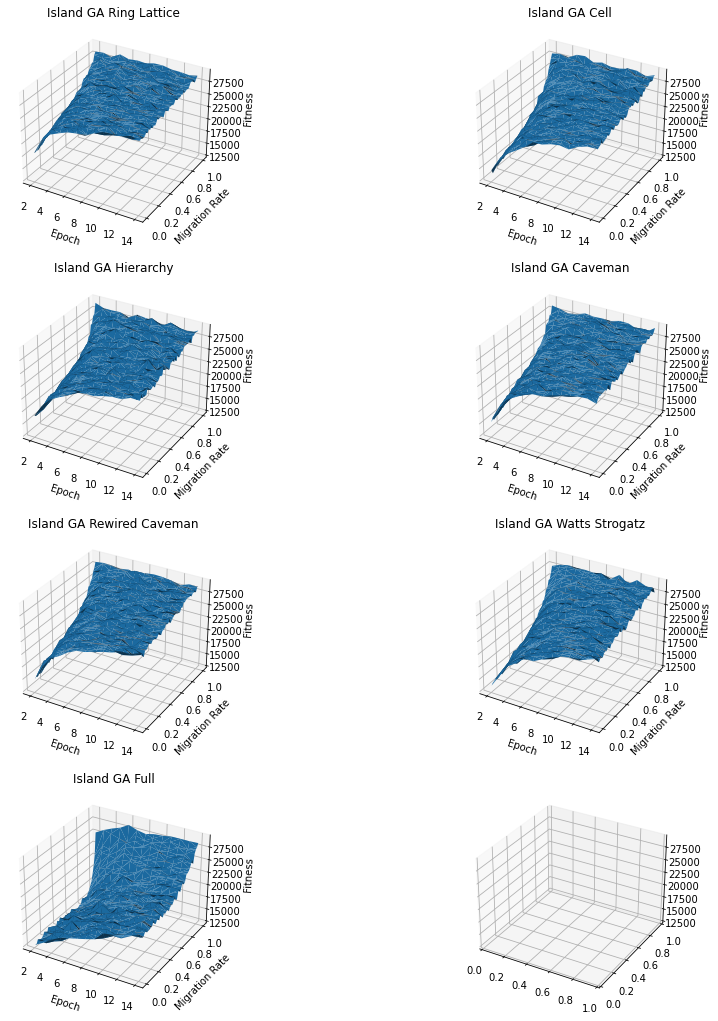

In [8]:
plot_epochs_migration_rate_vs_fitness('TSP', 320)